# Text Syntax and Understanding with NLTK and spaCy

**pip nltk spacy svgling**

Sources:

- Dipanjan Sarkar, Text Analytics with Python: A Practitioner's Guide to Natural Language Processing, 3. Processing and Understanding Text, https://learning.oreilly.com/library/view/text-analytics-with/9781484243541/html/427287_2_En_3_Chapter.xhtml

- Steven Bird, Ewan Klein, Edward Loper, Natural Language Processing with Python, Chapter 3. Processing Raw Text, https://learning.oreilly.com/library/view/natural-language-processing/9780596803346/ch03.html#sec-accessing-text

- Dipanjan (DJ) Sarkar, A Practitioner’s Guide to Natural Language Processing (Part I) – Processing & Understanding Text, https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72/

Github:

Text Analytics with Python - 2nd Edition, 
A Practitioner's Guide to Natural Language Processing, Ch03 - Processing and Understanding Text, https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition

NLTK How-To:

https://www.nltk.org/howto.html

spaCy:

https://spacy.io/usage/models

In [1]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

# Parts of Speech (POS) Tagging

In [2]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_md')

In [3]:
sentence = "US unveils world's most powerful supercomputer, beats China."
sentence_nlp = nlp(sentence)
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,VBZ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.
Tag type,PROPN,VERB,NOUN,PART,ADV,ADJ,NOUN,PUNCT,VERB,PROPN,PUNCT


In [4]:
# POS tagging with nltk
import nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,JJ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.


In [5]:
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [6]:
# default tagger
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')

In [7]:
# accuracy on test data
dt.evaluate(test_data)

0.1454158195372253

In [8]:
# tagging our sample headline
dt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NN'),
 ('world', 'NN'),
 ("'s", 'NN'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NN'),
 ('China', 'NN'),
 ('.', 'NN')]

In [9]:
# regex tagger
from nltk.tag import RegexpTagger
# define regex tag patterns
patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default) ... 
]
rt = RegexpTagger(patterns)

In [10]:
# accuracy on test data
rt.evaluate(test_data)

0.24039113176493368

In [11]:
# tagging our sample headline
rt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NNS'),
 ('world', 'NN'),
 ("'s", 'NN$'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NNS'),
 ('China', 'NN'),
 ('.', 'NN')]

In [12]:
## N gram taggers
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

In [13]:
# testing performance of unigram tagger
print(ut.evaluate(test_data))
print(ut.tag(nltk.word_tokenize(sentence)))

0.8607803272340013
[('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


In [14]:
# testing performance of bigram tagger
print(bt.evaluate(test_data))
print(bt.tag(nltk.word_tokenize(sentence)))

0.13466937748087907
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [15]:
# testing performance of trigram tagger
print(tt.evaluate(test_data))
print(tt.tag(nltk.word_tokenize(sentence)))

0.08064672281924679
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [16]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

ct = combined_tagger(train_data=train_data, 
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

In [17]:
# evaluating the new combined tagger with backoff taggers
print(ct.evaluate(test_data))      
print(ct.tag(nltk.word_tokenize(sentence)))

0.9094781682641108
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [18]:
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)

In [19]:
# evaluate tagger on test data and sample sentence
print(nbt.evaluate(test_data))
print(nbt.tag(nltk.word_tokenize(sentence)))

0.9306806079969019
[('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


In [20]:
# try this out for fun!
#met = ClassifierBasedPOSTagger(train=train_data,
#                               classifier_builder=MaxentClassifier.train)
#print(met.evaluate(test_data))                           
#print(met.tag(nltk.word_tokenize(sentence)))

# Shallow Parsing or Chunking

In [21]:
from nltk.corpus import treebank_chunk
data = treebank_chunk.chunked_sents()

train_data = data[:3500]
test_data = data[3500:]
# view sample data
print(train_data[7])

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [22]:
from nltk.chunk import RegexpParser

# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)

# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)

POS Tags: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  most/RBS
  (NP powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


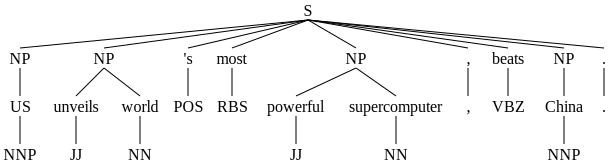

In [23]:
# print and view chunked sentence using chunking
import svgling
print(c)
c

In [24]:
# illustrate NP chunking based on explicit chink patterns
chink_grammar = """
NP:
    {<.*>+}             # Chunk everything as NP
    }<VBZ|VBD|JJ|IN>+{  # Chink sequences of VBD\VBZ\JJ\IN
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)

(S
  (NP US/NNP)
  unveils/JJ
  (NP world/NN 's/POS most/RBS)
  powerful/JJ
  (NP supercomputer/NN ,/,)
  beats/VBZ
  (NP China/NNP ./.))


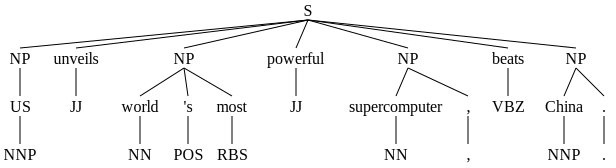

In [25]:
# print and view chunked sentence using chinking
print(c)
c

In [26]:
# create a more generic shallow parser
grammar = """
NP: {<DT>?<JJ>?<NN.*>}  
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}      
VP: {<MD>?<VB.*>+}
"""
rc = RegexpParser(grammar)
c = rc.parse(tagged_simple_sent)

(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  (ADVP most/RBS)
  (NP powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


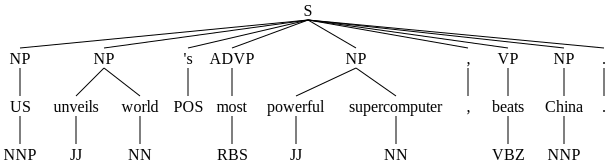

In [27]:
# print and view shallow parsed sample sentence
print(c)
c

In [28]:
# Evaluate parser performance on test data
print(rc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  46.1%%
    Precision:     19.9%%
    Recall:        43.3%%
    F-Measure:     27.3%%


In [29]:
from nltk.chunk.util import tree2conlltags, conlltags2tree
# look at a sample training tagged sentence
train_sent = train_data[7]
print(train_sent)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [30]:
# get the (word, POS tag, Chunk tag) triples for each token
wtc = tree2conlltags(train_sent)
wtc

[('A', 'DT', 'B-NP'),
 ('Lorillard', 'NNP', 'I-NP'),
 ('spokewoman', 'NN', 'I-NP'),
 ('said', 'VBD', 'O'),
 (',', ',', 'O'),
 ('``', '``', 'O'),
 ('This', 'DT', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('old', 'JJ', 'I-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [31]:
# get shallow parsed tree back from the WTC triples
tree = conlltags2tree(wtc)
print(tree)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [32]:
def conll_tag_chunks(chunk_sents):
  tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
  return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]
  
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [33]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)

In [34]:
# train the shallow parser
ntc = NGramTagChunker(train_data)

# test parser performance on test data
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  97.2%%
    Precision:     91.4%%
    Recall:        94.3%%
    F-Measure:     92.8%%


(S
  (NP US/NNP)
  unveils/VBZ
  (NP world/NN 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


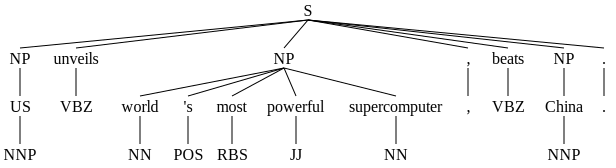

In [35]:
# parse our sample sentence
sentence_nlp = nlp(sentence)
tagged_sentence = [(word.text, word.tag_) for word in sentence_nlp]
tree = ntc.parse(tagged_sentence)
print(tree)
tree

In [36]:
from nltk.corpus import conll2000
wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:10000]
test_wsj_data = wsj_data[10000:]
# look at a sample sentence in the corpus
print(train_wsj_data[10])

(S
  (NP He/PRP)
  (VP reckons/VBZ)
  (NP the/DT current/JJ account/NN deficit/NN)
  (VP will/MD narrow/VB)
  (PP to/TO)
  (NP only/RB #/# 1.8/CD billion/CD)
  (PP in/IN)
  (NP September/NNP)
  ./.)


In [37]:
# train the shallow parser
tc = NGramTagChunker(train_wsj_data)

# test performance on the test data
print(tc.evaluate(test_wsj_data))

ChunkParse score:
    IOB Accuracy:  89.1%%
    Precision:     80.3%%
    Recall:        86.1%%
    F-Measure:     83.1%%


(S
  (NP US/NNP)
  (VP unveils/VBZ)
  (NP world/NN)
  (NP 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


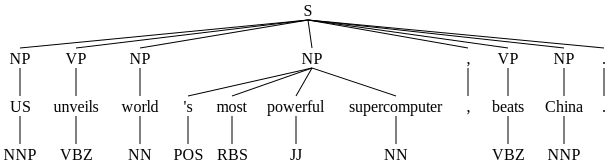

In [38]:
# parse our sample sentence
tree = tc.parse(tagged_sentence)
print(tree)
tree

# Dependency Parsing

In [39]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---US[nsubj]--->[]
--------
['US']<---unveils[ccomp]--->['supercomputer']
--------
[]<---world[poss]--->["'s"]
--------
[]<---'s[case]--->[]
--------
[]<---most[advmod]--->[]
--------
['most']<---powerful[amod]--->[]
--------
['world', 'powerful']<---supercomputer[dobj]--->[]
--------
[]<---,[punct]--->[]
--------
['unveils', ',']<---beats[ROOT]--->['China', '.']
--------
[]<---China[dobj]--->[]
--------
[]<---.[punct]--->[]
--------


In [40]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})